In [26]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

In [27]:
import numpy as np
import matplotlib.pyplot as plt

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 221/221 dipoles valid
3.146

 =============== GDM Simulation Information ===============
numerical precision: <class 'numpy.float32'> / <class 'numpy.complex64'>

 ------ nano-object -------
   Homogeneous object. 
   material:             "Aluminium, Rakic"
   mesh type:            hex
   nominal stepsize:     8.264462809917356nm
   nr. of meshpoints:    221

 ----- incident field -----
   field generator: "plane_wave"
   200 wavelengths between 299.99999999999994 and 999.9999999999998nm
   1 incident field configurations per wavelength
      - 0: 'theta': 0.0

 ------ environment -------
 3-layer environment: quasistatic 3D '1-2-3' Green's tensors
 
   n3 = constant index material, n=(1+0j)  <-- top
   n2 = constant index material, n=(1+0j)  <-- structure zone (height "spacing" = 5000nm)
   n1 = constant index material, n=(1+0j)  <-- substrate

 ===== *core.scatter* ======
   NO sel

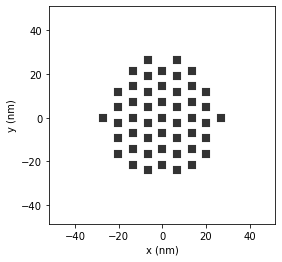

hex ----- N_dipoles = 221timing for wl=300.00nm - setup: EE 22.6ms, inv.: 182.2ms, repropa.: 9.3ms (1 field configs), tot: 214.2ms
timing for wl=301.82nm - setup: EE 16.2ms, inv.: 161.4ms, repropa.: 12.8ms (1 field configs), tot: 190.4ms
timing for wl=303.65nm - setup: EE 20.3ms, inv.: 186.7ms, repropa.: 11.2ms (1 field configs), tot: 219.1ms
timing for wl=305.49nm - setup: EE 25.0ms, inv.: 172.7ms, repropa.: 7.2ms (1 field configs), tot: 205.0ms
timing for wl=307.35nm - setup: EE 20.1ms, inv.: 175.4ms, repropa.: 11.0ms (1 field configs), tot: 207.0ms
timing for wl=309.21nm - setup: EE 19.7ms, inv.: 174.2ms, repropa.: 11.7ms (1 field configs), tot: 206.0ms
timing for wl=311.09nm - setup: EE 19.4ms, inv.: 167.3ms, repropa.: 12.7ms (1 field configs), tot: 200.0ms
timing for wl=312.98nm - setup: EE 18.6ms, inv.: 171.7ms, repropa.: 13.6ms (1 field configs), tot: 203.8ms
timing for wl=314.88nm - setup: EE 22.2ms, inv.: 167.8ms, repropa.: 11.2ms (1 field configs), tot: 201.1ms
timing for wl=

timing for wl=478.01nm - setup: EE 15.9ms, inv.: 183.3ms, repropa.: 9.0ms (1 field configs), tot: 208.7ms
timing for wl=480.92nm - setup: EE 25.6ms, inv.: 182.4ms, repropa.: 8.7ms (1 field configs), tot: 216.8ms
timing for wl=483.83nm - setup: EE 16.7ms, inv.: 176.1ms, repropa.: 13.7ms (1 field configs), tot: 206.5ms
timing for wl=486.77nm - setup: EE 12.5ms, inv.: 179.0ms, repropa.: 18.0ms (1 field configs), tot: 209.4ms
timing for wl=489.72nm - setup: EE 26.3ms, inv.: 197.4ms, repropa.: 8.8ms (1 field configs), tot: 234.0ms
timing for wl=492.70nm - setup: EE 13.7ms, inv.: 188.7ms, repropa.: 11.3ms (1 field configs), tot: 215.0ms
timing for wl=495.69nm - setup: EE 18.4ms, inv.: 171.1ms, repropa.: 25.6ms (1 field configs), tot: 215.1ms
timing for wl=498.69nm - setup: EE 14.4ms, inv.: 181.9ms, repropa.: 9.8ms (1 field configs), tot: 206.7ms
timing for wl=501.72nm - setup: EE 15.7ms, inv.: 177.0ms, repropa.: 9.5ms (1 field configs), tot: 202.3ms
timing for wl=504.76nm - setup: EE 22.4ms,

timing for wl=761.66nm - setup: EE 15.3ms, inv.: 168.5ms, repropa.: 9.0ms (1 field configs), tot: 193.3ms
timing for wl=766.28nm - setup: EE 19.4ms, inv.: 175.7ms, repropa.: 6.0ms (1 field configs), tot: 202.2ms
timing for wl=770.93nm - setup: EE 27.8ms, inv.: 174.6ms, repropa.: 15.7ms (1 field configs), tot: 218.1ms
timing for wl=775.61nm - setup: EE 21.0ms, inv.: 162.0ms, repropa.: 11.6ms (1 field configs), tot: 194.6ms
timing for wl=780.32nm - setup: EE 27.9ms, inv.: 177.7ms, repropa.: 9.0ms (1 field configs), tot: 214.6ms
timing for wl=785.05nm - setup: EE 13.5ms, inv.: 164.5ms, repropa.: 8.9ms (1 field configs), tot: 187.0ms
timing for wl=789.82nm - setup: EE 22.1ms, inv.: 164.3ms, repropa.: 9.0ms (1 field configs), tot: 195.4ms
timing for wl=794.61nm - setup: EE 15.1ms, inv.: 164.1ms, repropa.: 10.0ms (1 field configs), tot: 189.2ms
timing for wl=799.43nm - setup: EE 32.0ms, inv.: 187.1ms, repropa.: 16.5ms (1 field configs), tot: 235.6ms
timing for wl=804.28nm - setup: EE 26.4ms,

In [28]:
## Setup geometry
q_abs = []
landa = []
Q_abs = []
rad = np.arange(2.6, 2.7, 0.125)
for R in rad:
    scale_factor = 1.21
    step = 10/scale_factor
    radius = R*scale_factor
    geometry = structures.sphere(step, R = radius , mesh='hex', ORIENTATION=2 )
    material = materials.alu()
    struct = structures.struct(step, geometry, material)
    print(radius)
## Setup incident field
    field_generator = fields.plane_wave
    wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 200))
    kwargs = dict(theta = [0.0])
    efield = fields.efield(field_generator, wavelengths=wavelengths,
                                                       kwargs=kwargs)
## Setup environment
    n1=n2=1
    dyads = propagators.DyadsQuasistatic123(n1=n1, n2=n2)
##   
    sim = core.simulation(struct, efield, dyads)
    print(sim)
##    
    visu.structure(sim)
    print('hex ----- N_dipoles =', len(sim.struct.geometry), end='')
    
    sim.scatter()
    field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
    wl, spec = tools.calculate_spectrum(sim, field_kwargs, linear.extinct)
    a_ext, a_sca, a_abs = spec.T
    a_geo = tools.get_geometric_cross_section(sim)
    
    q_abs = q_abs + [a_abs/a_geo]

In [29]:
N = len(rad)
Q_abs = np.array([q_abs])
Qabs = [None]*N
Qabs = Q_abs.reshape(-1)
Q = np.array_split(Qabs, N)
Q[0]

array([0.80192055, 0.78262957, 0.76506719, 0.74924411, 0.7351223 ,
       0.72256497, 0.71144175, 0.70166321, 0.69294605, 0.68526405,
       0.6786978 , 0.67345667, 0.66985939, 0.66797065, 0.66797519,
       0.66998488, 0.67401644, 0.6800581 , 0.68779852, 0.69675728,
       0.70638182, 0.71597321, 0.72469977, 0.73160883, 0.73585604,
       0.73672112, 0.73371427, 0.72666165, 0.71566217, 0.70126013,
       0.68423169, 0.66540161, 0.64558818, 0.62551149, 0.60577011,
       0.58681041, 0.56882024, 0.55187774, 0.53595278, 0.52094536,
       0.50677015, 0.49332312, 0.48039312, 0.46789452, 0.45577771,
       0.4440251 , 0.43263957, 0.42173003, 0.41126722, 0.4011912 ,
       0.39148974, 0.38214403, 0.37313538, 0.36447563, 0.35629279,
       0.34844371, 0.34095405, 0.33385802, 0.32719632, 0.32101114,
       0.31541643, 0.31048187, 0.30610953, 0.30231531, 0.29910702,
       0.29648612, 0.29444921, 0.29298719, 0.29217901, 0.29192307,
       0.29216423, 0.29287745, 0.29403267, 0.29559659, 0.29752

In [30]:
Q_abs = np.array(Q_abs).T
Q_abs = Q_abs.reshape(200, 1)
Q_abs.shape

(200, 1)

Text(0, 0.5, 'abs')

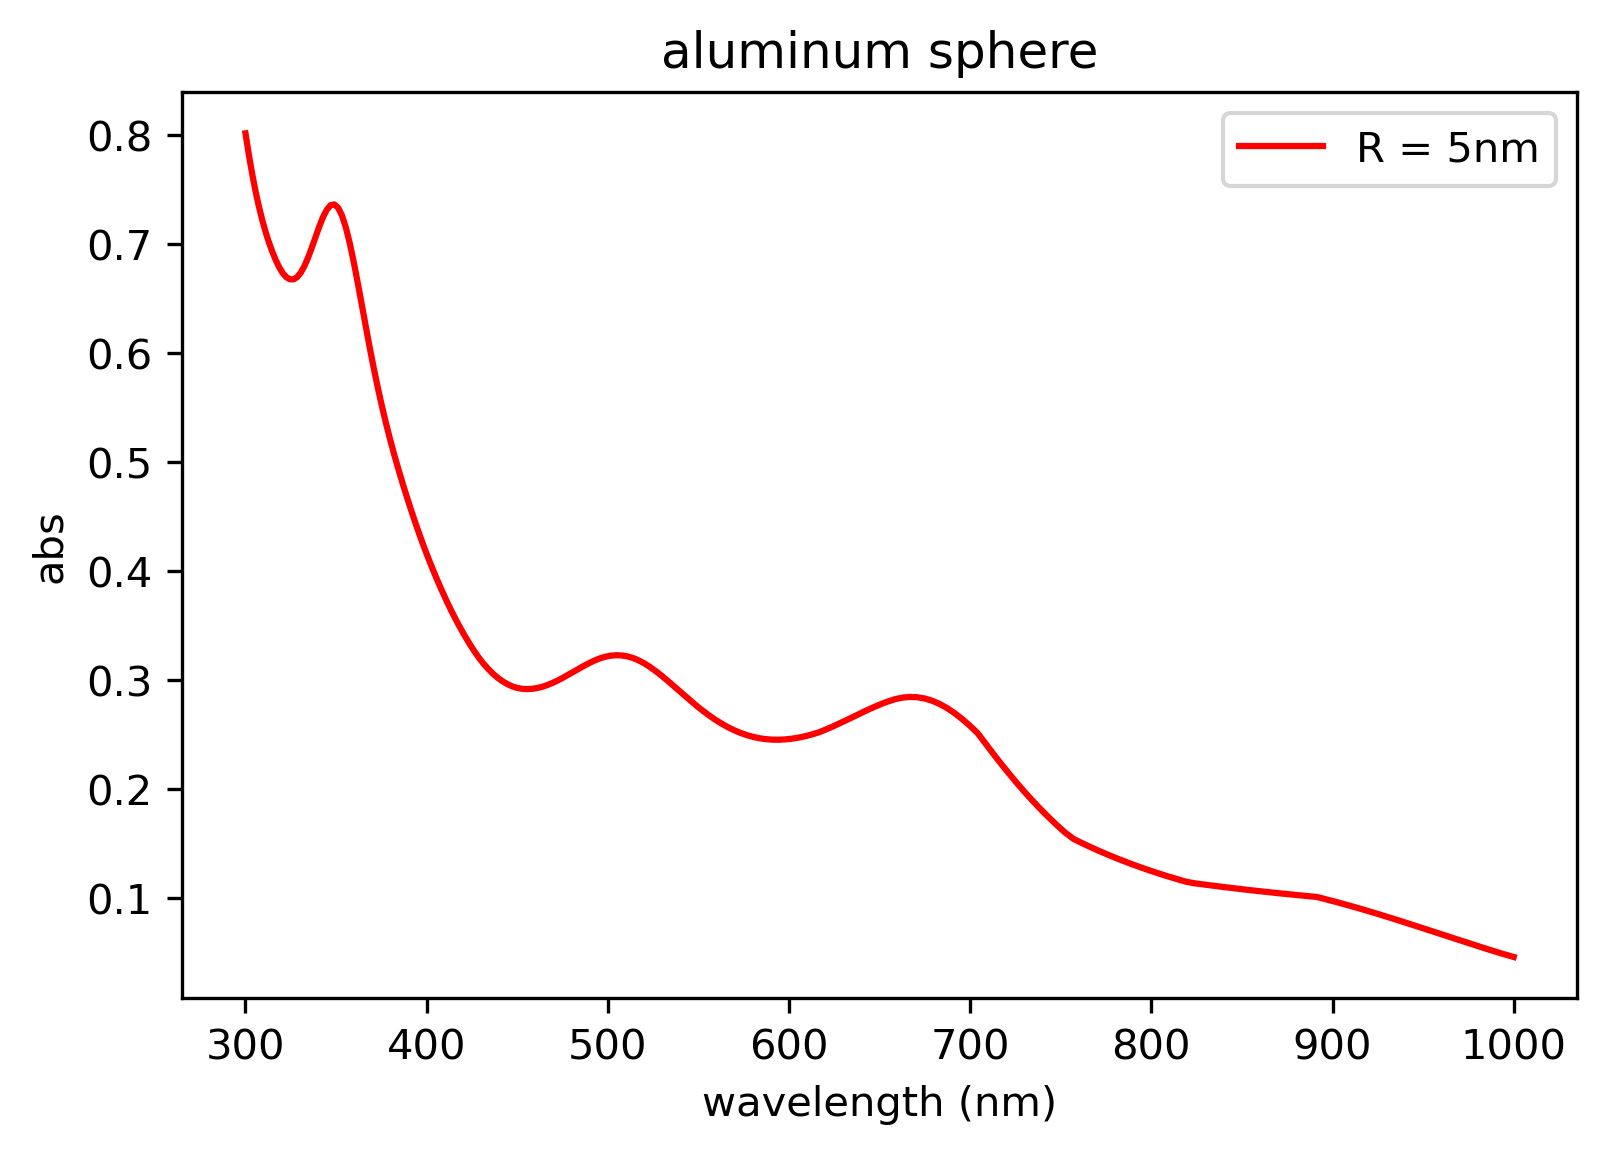

In [31]:
plt.figure(dpi = 300)
plt.title("aluminum sphere")
landa = np.array([wavelengths]).T
plt.plot(landa,Q_abs[:, 0],  linewidth=1.5, color='r', label='R = 5nm')
plt.legend()

plt.xlabel("wavelength (nm)")
plt.ylabel("abs")

In [32]:
import pandas as pd

In [33]:
wl = []
q_abs = []
r = []
N = []
for bankinh in rad:
    for landa in wavelengths :
        r = r + [bankinh]
        wl = wl + [landa]
        
q_abs  = a_abs/a_geo    
#x = np.array([r]) .T
y = np.array([wl]) .T
z = np.array([Qabs]).T
#arr = np.concatenate((x*10, y, z),axis = 1)
arr = np.concatenate(( y, z),axis = 1)
arr

array([[3.00000000e+02, 8.01920545e-01],
       [3.01820536e+02, 7.82629573e-01],
       [3.03652120e+02, 7.65067191e-01],
       [3.05494819e+02, 7.49244107e-01],
       [3.07348700e+02, 7.35122297e-01],
       [3.09213831e+02, 7.22564969e-01],
       [3.11090281e+02, 7.11441754e-01],
       [3.12978118e+02, 7.01663212e-01],
       [3.14877411e+02, 6.92946045e-01],
       [3.16788230e+02, 6.85264053e-01],
       [3.18710644e+02, 6.78697800e-01],
       [3.20644725e+02, 6.73456669e-01],
       [3.22590543e+02, 6.69859389e-01],
       [3.24548169e+02, 6.67970647e-01],
       [3.26517674e+02, 6.67975186e-01],
       [3.28499131e+02, 6.69984878e-01],
       [3.30492613e+02, 6.74016440e-01],
       [3.32498192e+02, 6.80058101e-01],
       [3.34515942e+02, 6.87798522e-01],
       [3.36545936e+02, 6.96757283e-01],
       [3.38588250e+02, 7.06381815e-01],
       [3.40642957e+02, 7.15973212e-01],
       [3.42710133e+02, 7.24699775e-01],
       [3.44789853e+02, 7.31608829e-01],
       [3.468821

In [34]:
from pandas import DataFrame 
data = pd.DataFrame(arr,
                      columns = ["wavelength_nm", "abs"])
data

,wavelength_nm,abs
0,300.000000,0.801921
1,301.820536,0.782630
2,303.652120,0.765067
3,305.494819,0.749244
4,307.348700,0.735122
...,...,...
195,976.090025,0.058272
196,982.013382,0.055146
197,987.972684,0.051998
198,993.968150,0.048963


In [35]:
data.to_csv("data_test_aluminum_26nm_200wavelengths.csv")